In [11]:
# load JSON
import json

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# hourly data 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])
data['year'] = data['ds'].dt.year
data['month'] = data['ds'].dt.month
#data['day'] = data['ds'].dt.day
data['hour'] = data['ds'].dt.hour
data['weekday'] = data['ds'].dt.weekday
data2 = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-temp.pkl')
data['temp'] = data2.y
data2 = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-humidity.pkl')
data['humi'] = data2.y
#data['1'] =  np.random.rand(len(data),1)
#data['2'] =  np.random.rand(len(data),1)
#data['3'] =  np.random.rand(len(data),1)
#data['4'] =  np.random.rand(len(data),1)
#data['5'] =  np.random.rand(len(data),1)
#data['6'] =  np.random.rand(len(data),1)

In [12]:
df = data
df = df.drop(columns="ds")
df = df.dropna()
df = df
df.tail()

# summarize data
print(df.shape)
#df.describe()

# normalize
target_column = ['y'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

(55000, 7)


,y,year,month,hour,weekday,temp,humi
count,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,47.306673,0.998459,0.529715,0.496052,0.499039,0.541450,0.506277
std,44.149533,0.000951,0.285786,0.298263,0.332934,0.144836,0.106354
min,5.000000,0.996533,0.083333,0.000000,0.000000,0.159091,0.167715
25%,24.000000,0.997524,0.250000,0.217391,0.166667,0.428977,0.431866
50%,36.000000,0.998514,0.500000,0.478261,0.500000,0.528409,0.502096
75%,54.000000,0.999505,0.750000,0.739130,0.833333,0.656250,0.577568
max,979.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X = df[predictors].values
y = df[target_column].values

test_size = 0.10
ind = round((1-test_size)*len(X))
#X_train = X[:ind]
#X_test = X[ind:]
#y_train = y[:ind]
#y_test = y[ind:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=40)
print(X_train.shape); print(X_test.shape)

(52250, 6)
(2750, 6)


In [14]:
# RANDOM FOREST
#RF model
model_rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
r2_1 = r2_score(y_train, pred_train_rf)
print(r2_1)

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
r2_2 = r2_score(y_test, pred_test_rf)
print(r2_2)

/home/aety/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


10.293235775986625
0.9457974077024335
25.24665122419929
0.6542109401916903


In [15]:
n = X_train.shape[0]
p = X_train.shape[1]
print(1-(1-r2_1)*(n-1)/(n-p-1))
print(1-(1-r2_2)*(n-1)/(n-p-1))

0.9457911826473298
0.6541712270366485


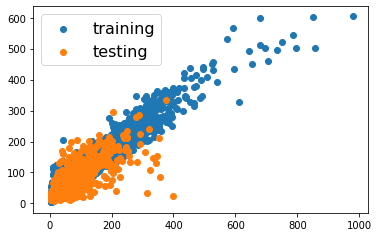

In [16]:
# PLOT RANDOM FOREST results
plt.scatter(y_train,pred_train_rf)
plt.scatter(y_test,pred_test_rf)
plt.legend(('training','testing'),fontsize=16)
plt.gca().set_aspect('equal', adjustable='box')

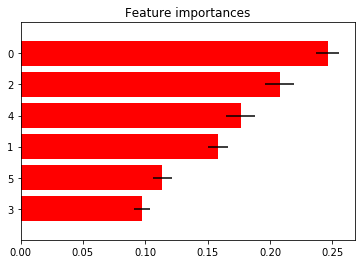

In [17]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
strArr = ['month','day','weekday','hour','temp','humi']
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [8]:
## DECISION TREE
#dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
#
#dtree.fit(X_train, y_train)
#
## Code lines 1 to 3
#pred_train_tree= dtree.predict(X_train)
#print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
#print(r2_score(y_train, pred_train_tree))
#
## Code lines 4 to 6
#pred_test_tree= dtree.predict(X_test)
#print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
#print(r2_score(y_test, pred_test_tree))

In [9]:
## DECISION TREE--more tweaking
## Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
#dtree1 = DecisionTreeRegressor(max_depth=2)
#dtree2 = DecisionTreeRegressor(max_depth=5)
#dtree1.fit(X_train, y_train)
#dtree2.fit(X_train, y_train)

## Code Lines 5 to 6: Predict on training data
#tr1 = dtree1.predict(X_train)
#tr2 = dtree2.predict(X_train) 

##Code Lines 7 to 8: Predict on testing data
#y1 = dtree1.predict(X_test)
#y2 = dtree2.predict(X_test) 

## Print RMSE and R-squared value for regression tree 'dtree1' on training data
#print(np.sqrt(mean_squared_error(y_train,tr1))) 
#print(r2_score(y_train, tr1))

## Print RMSE and R-squared value for regression tree 'dtree1' on testing data
#print(np.sqrt(mean_squared_error(y_test,y1))) 
#print(r2_score(y_test, y1)) 

## Print RMSE and R-squared value for regression tree 'dtree2' on training data
#print(np.sqrt(mean_squared_error(y_train,tr2))) 
#print(r2_score(y_train, tr2))

## Print RMSE and R-squared value for regression tree 'dtree2' on testing data
#print(np.sqrt(mean_squared_error(y_test,y2))) 
#print(r2_score(y_test, y2)) 